## Graphical Models and Expectation-Maximization (II)

#### *22 November 2019*
#### *DATA 1010*

In [1]:
import Pkg;
Pkg.status("Plots")

    Status `~/Data-1010-Lecture Notes/11-22-2019 - Graphical Model and EM II/Project.toml`
  [91a5bcdd] Plots v0.27.0


In [9]:
using Pkg
Pkg.activate(".")

Activating environment at `~/Data-1010-Lecture Notes/11-22-2019 - Graphical Model and EM II/Project.toml`


In [2]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1242
ERROR: LoadError: ArgumentError: Package NaNMath does not have Compat in its dependencies:
- If you have NaNMath checked out for development and have
  added Compat as a dependency but haven't updated your primary
  environment's manifest file, try `Pkg.resolve()`.
- Otherwise you may need to report an issue with NaNMath
Stacktrace:
 [1] require(::Module, ::Symbol) at ./loading.jl:889
 [2] include at ./boot.jl:328 [inlined]
 [3] include_relative(::Module, ::String) at ./loading.jl:1094
 [4] include(::Module, ::String) at ./Base.jl:31
 [5] top-level scope at none:2
 [6] eval at ./boot.jl:330 [inlined]
 [7] eval(::Expr) at ./client.jl:432
 [8] top-level scope at ./none:3
in expression starting at /opt/julia/packages/NaNMath/pEdac/src/NaNMath.jl:4
ERROR: LoadError: Failed to precompile NaNMath [77ba4419-2d1f-58cd-9bb1-8ffee604a2e3] to /home/jovyan/.julia/compiled/v1.2/NaNMath/k9Y1O.ji.
Stacktrace:
 

ErrorException: Failed to precompile Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] to /home/jovyan/.julia/compiled/v1.2/Plots/ld3vC.ji.

In [3]:
using OffsetArrays

In [4]:
using Distributions, StatsBase

*Introduction*. Last time we talked about Expectation-Maximization in the context of Gaussian mixture models. With that concrete example in mind, we will discuss the general EM algorithm for Bayes net inference. 

Consider a Bayesian network for which some of the random variables are observed, while others are hidden. Suppose that the conditional distributions in the network are specified in some parametric way. We will look for parameters which maximize the likelihood of the model with respect to the observed data as follows, beginning with an arbitrary initial guess for the parameter values: 

(1) Assuming the current parameter values, we find the conditional distribution of the hidden variables for each observation.  
(2) With respect to that distribution over the hidden variables, we work out the *expected* log likelihood and find the parameters which maximize it.

We repeat these steps to convergence.

![](1.JPG)

Note from the above graph: $\pi_i$ is the conditional expectation of Z given X, that is also the conditional density of Z given X for class purple (calculated like what we did for QDA).

![](2.JPG)

Same way we compute the $\Sigma_0$, $\Sigma_1$, $\mu_0$. Note from the above graph, if the initial guess is bad or Bayes net is more complex, this specific algorithm maynot get the result of highest likelihood (this may only work for Gaussian Mixture). Therefore we need a more general one.

![](3.JPG)

---

## Problem 1

Show that this algorithm generalizes the one we came up with last time for the Gaussian mixture model.

*Solution*. 

![](4.JPG)

Note from above: to find the $\alpha$ that maximizes this expression, we differentiate w.r.t the underscore part of the last line.

![](5.JPG)

![](6.JPG)

![](7.JPG)

Note from above: we can get $\mu_0$ and $\Sigma_0$ that maximizes the likelihood in a similar way.

---

Another common example of a Bayesian network is a **hidden Markov model**. The idea is that we have a Markov chain, but rather than getting to see its values directly, we see some other values which are corruptions of the actual values. 

![](8.JPG)

Consider the following Markov chain Z. Come up with a way to estimate the transition matrix entries from the data.

In [5]:
# set the state of transition matrix to be 0 and 1
P = OffsetArray([0.2 0.8
                 1/3 2/3], 0:1, 0:1)

n = 100

function markov_chain(P, n)
    Z = [0] # start with state 0
    for i in 1:n-1
        current_state = Z[end]
        push!(Z, rand() < P[current_state, 0] ? 0 : 1)
    end
    Z
end
Z = markov_chain(P, n)
Z'

1×100 LinearAlgebra.Adjoint{Int64,Array{Int64,1}}:
 0  1  1  0  1  0  1  1  0  1  1  1  1  …  1  1  0  1  0  1  1  1  1  0  1  1

Now suppose that instead of getting to see $Z$, we only see Z plus a standard normal random variable (which is independent for every observation of $Z$): 

In [6]:
X = Z + randn(n)
X' # the corrupted variable (Z is hidden, corrupted is not)

1×100 LinearAlgebra.Adjoint{Float64,Array{Float64,1}}:
 -0.729265  1.80244  2.82272  0.892426  …  -1.01011  1.66794  0.224773

In [7]:
plot(Z, size = (800, 200), ylims = (-4, 4), label = "original signal", titlefont = 10)
plot!(X, size = (800, 200), ylims = (-4, 4), label = "corrupted signal", titlefont = 10)

UndefVarError: UndefVarError: plot not defined

![](9.JPG)

# Problem 2

Draw a Bayes net diagram illustrating the relationship between $Z_1, Z_2, \ldots, Z_n, X_1, X_2, \ldots, X_n$. 

*Solution*. 

![](10.JPG)

## Problem 3

Consider the following observed values for $X$. 

(a) Try to guess the values of $Z$, and then check your guess by running the cell. Repeat a few times to get a feel for how accurately you can predict $X$ from $Z$. 

In [16]:
Z = markov_chain(P, 4)
X = Z + randn(4)
X'

1×4 LinearAlgebra.Adjoint{Float64,Array{Float64,1}}:
 -0.459662  2.90265  -0.426818  2.84795

In [17]:
Z

4-element Array{Int64,1}:
 0
 1
 0
 1

(b) In playing the game in part (a), would it be helpful to consider the $X$ values in all positions when guessing the value of $Z_3$? 

*Solution:* Yes. It would be helpful to consider all the values of X.

(c) Come up with an example (by adjusting the parameters of the model) where accounting for the other $X$ values is clearly important.

![](11.JPG)

![](12.JPG)

---
## Summary

![](13.JPG)

![](14.JPG)

---

## Problem 4

Let's simplify a bit by considering a model in which the Markov chain transition matrix takes the form 

$$
P = \left[ \begin{matrix} q & 1-q \\ 1-q & q\end{matrix} \right]
$$

Let's assume that the Gaussian distribution has unknown variance $\sigma^2$. So we'll be trying to estimate $q$ and $\sigma^2$ based on a series of observations of the values of $X$.

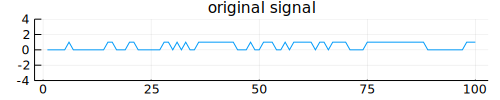

In [10]:
q = 0.8
σ² = 2.25
P = OffsetArray([q 1-q; 1-q q], 0:1, 0:1)
Z = markov_chain(P, 100)
plot(Z, size = (500, 100), ylims = (-4, 4), title = "original signal", titlefont = 10)

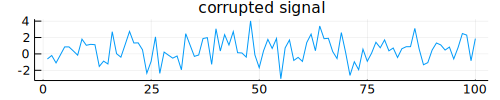

In [11]:
X = Z + √(σ²)*randn(100)
plot(X, size = (500, 100), title = "corrupted signal", titlefont = 10)

Let's see how Expectation-Maximization works out in this context. We begin by working out the likelihood (trigger warning: the amount of math notation is about to get downright comical. This is how it's done, and I'm not sure how feasible it is to come up with something better. Try to focus on the meaning of each component, and don't worry too much about the particular choices of how each function is written down. Consider it practice for getting what you need out of a research paper.)

$$
\begin{align*}
p(x_1, \ldots, x_n, z_1, \ldots, z_n) &=
p(z_1)\prod_{k=2}^n [q\mathbf{1}_{z_k = z_{k-1}} +
(1-q)\mathbf{1}_{z_k \neq z_{k-1}}]\prod_{k=1}^n \left(\frac{1}{\sqrt{2\pi \sigma^2}}
  e^{-\frac{(x_k-z_k)^2}{2\sigma^2}}\right)
\end{align*}
$$

(a) Explain where each factor in the expression above comes from.

(b) What would it mean for this function to have an exceptionally small value?

Now we take the log: 

$$
\begin{align*}
&\log(p(x_1, \ldots, x_n, z_1, \ldots, z_n)) =
\log(p(z_1)) + \sum_{k=2}^n
\log([q\mathbf{1}_{z_k = z_{k-1}} + (1-q)\mathbf{1}_{z_k \neq z_{k-1}}])
+ \sum_{k=1}^n \log\left(\frac{1}{\sqrt{2\pi \sigma^2}}
  e^{-\frac{(x_k-z_k)^2}{2\sigma^2}}\right) \\
&= \log(p(z_1)) + \log(q)\sum_{k=2}^n \mathbf{1}_{z_k = z_{k-1}} +
\log(1-q) \sum_{k=2}^n \mathbf{1}_{z_k \neq z_{k-1}} -
\frac{1}{2\sigma^2}\sum_{k=1}^n (x_k-z_k)^2 - \frac{n}{2} \log(2\pi\sigma^2).
\end{align*}
$$

And finally the expectation with respect to the conditional distribution of the $Z$ values given the observed $X$ values: 

$$
\begin{align*}
&\mathbb{E}_{Z|X=x^*}^{\theta_{k-1}}\left[\log(p(z_1))\right] +
\log(q)\mathbb{E}_{Z|X=x^*}^{\theta_{k-1}}\left[\sum_{k=2}^n \mathbf{1}_{z_k = z_{k-1}}\right] +
\log(1-q) \mathbb{E}_{Z|X=x^*}^{\theta_{k-1}}\left[\sum_{k=2}^n \mathbf{1}_{z_k \neq z_{k-1}}\right] -
\frac{1}{2\sigma^2}\mathbb{E}_{Z|X=x^*}^{\theta_{k-1}}\left[\sum_{k=1}^n (x_k-z_k)^2\right] -
\mathbb{E}_{Z|X=x^*}^{\theta_{k-1}}\left[\frac{n}{2} \log(2\pi\sigma^2)\right] \\
&=
\log(p(z_1)) +
\log(q)\underbrace{\mathbb{E}_{Z|X=x^*}^{\theta_{k-1}}\left[\sum_{k=2}^n \mathbf{1}_{z_k = z_{k-1}}\right]}_{a} +
\log(1-q) \underbrace{\mathbb{E}_{Z|X=x^*}^{\theta_{k-1}}\left[\sum_{k=2}^n \mathbf{1}_{z_k \neq z_{k-1}}\right]}_{b} -
\frac{1}{2\sigma^2}\underbrace{\mathbb{E}_{Z|X=x^*}^{\theta_{k-1}}\left[\sum_{k=1}^n (x_k-z_k)^2\right]}_{c} -
\frac{n}{2} \log(2\pi\sigma^2) \\
&=
\log(p(z_1)) + a\log(q) + b\log(1-q) - \frac{c}{2\sigma^2} -
\frac{n}{2}\log(2\pi\sigma^2).
\end{align*}
$$

We can differentiate this expression with respect to $q$ and with respect to $\sigma^2$ to find that 

$$
\begin{align*}
q &= \frac{a}{a+b} \\
\sigma^2 &= \frac{c}{n}
\end{align*}
$$

So we'll be all set to implement the EM algorithm if we can evaluate or estimate the $a$, $b$, and $c$ values. 

(c) Let's focus on $a$. Interpret its value. What are some strategies we could use for estimating it?

In [7]:
include("expectation-maximization.jl")

em_algorithm

In [8]:
em_algorithm(X)